In [99]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_line, scale_x_datetime, scale_y_continuous, xlab, ylab, theme_xkcd, labs
from mizani.breaks import date_breaks
from mizani.formatters import date_format, dollar_format

In [36]:
revenue = pd.read_excel('revenue.xlsx').dropna()
revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 2 to 36
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    35 non-null     datetime64[ns]
 1   In-Person               35 non-null     float64       
 2   Remote                  35 non-null     float64       
 3   Remote and Meetingless  35 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.4 KB


In [62]:
stacked_rev = revenue.melt(id_vars=['Date'], value_vars=['In-Person', 'Remote', 'Remote and Meetingless'],
                           var_name='Sales Process', value_name='Revenue')
stacked_rev['Revenue'] = stacked_rev['Revenue']/1000000

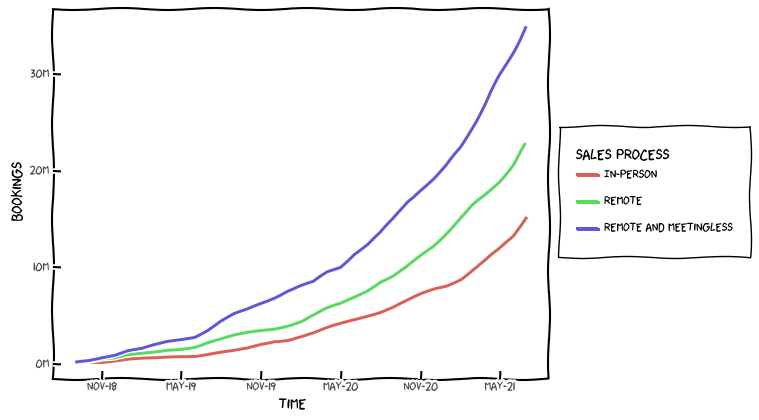

<ggplot: (341155822)>

In [71]:
(ggplot(stacked_rev)
+ aes(x="Date", y="Revenue", group='Sales Process', color='Sales Process')
+ scale_y_continuous(labels=dollar_format(prefix='', digits=0, big_mark=',', suffix='M'))
+ scale_x_datetime(breaks=date_breaks('6 months'), labels=date_format('%b-%y'))
+ xlab('Time')
+ ylab('Bookings')
+ theme_xkcd()
+ geom_line(size=1.2))

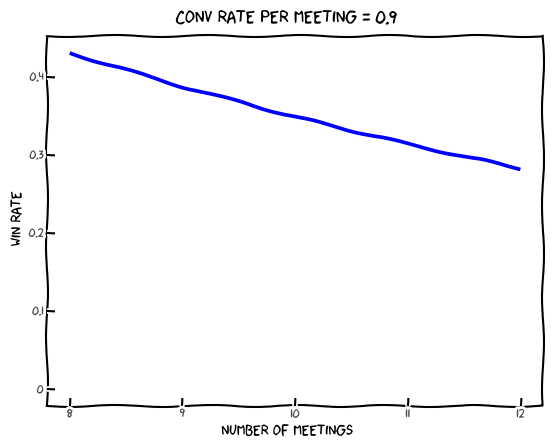

<ggplot: (340655258)>

In [108]:
meeting_cr = 0.9
n_meetings = np.linspace(8, 12, 5)
win_rate = np.power(meeting_cr, n_meetings)
win_rate_data = pd.DataFrame({"Number of Meetings": n_meetings, "Win Rate": win_rate})

(ggplot(win_rate_data)
+labs(title="Conv Rate per Meeting = 0.9")
+aes(x="Number of Meetings", y="Win Rate")
+scale_y_continuous(limits=[0, np.max(win_rate)])
+theme_xkcd()
+geom_line(size=1.5, color='blue'))

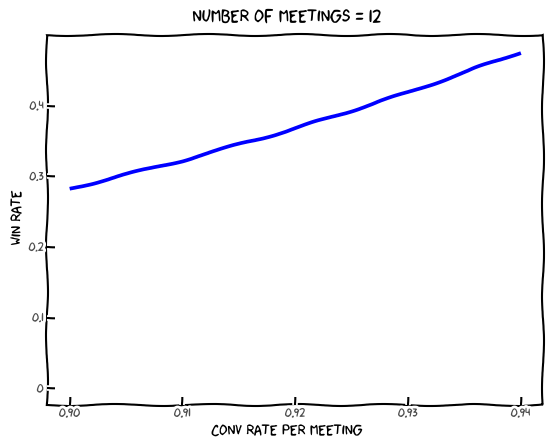

<ggplot: (340926922)>

In [105]:
n_meetings = 12
cr_per_meeting = np.linspace(0.9, 0.94, 5)
win_rate = np.power(cr_per_meeting, n_meetings)
win_rate_data = pd.DataFrame({"Conv Rate per Meeting": cr_per_meeting, "Win Rate": win_rate})

(ggplot(win_rate_data)
 +labs(title='Number of Meetings = 12')
 +aes(x="Conv Rate per Meeting", y="Win Rate")
 +scale_y_continuous(limits=[0, np.max(win_rate)])
 +theme_xkcd()
 +geom_line(size=1.5, color='blue'))